<a href="https://colab.research.google.com/github/Tirta2241720045/Machine_Learning/blob/main/Minggu11/2241720045_TirtaNBP_Praktikum11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama: Tirta Nurrochman Bintang Prawira
# NIM: 2241720045
# Kelas: TI-3A
# No Absen: 27

# Praktikum 1 Klasifikasi 🐱 dan 🐶

## Langkah 1 - Import Library

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Kode ini mengimpor TensorFlow dan `ImageDataGenerator` untuk augmentasi gambar, yang membantu model belajar dari variasi data gambar.

## Langkah 2 - Pra Pengolahan Data
### Langkah 2.1. Pra Pengolahan Data Training

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/Minggu11/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8020 images belonging to 2 classes.


Kode ini melakukan augmentasi gambar dengan `ImageDataGenerator`, seperti merescalekan nilai pixel, rotasi, zoom, dan flip horizontal. Kemudian, gambar diambil dari folder `training_set` dan diubah ukurannya menjadi 64x64 piksel, dengan batch size 32, untuk dua kelas ('binary'). Output menunjukkan ada 8020 gambar yang ditemukan dalam dua kelas.

### Langkah 2.2. Pra Pengolahan Data Testing

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset/Minggu11/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


Kode ini menggunakan `ImageDataGenerator` untuk merescalekan gambar pada dataset pengujian. Gambar diambil dari folder `test_set`, diubah ukurannya menjadi 64x64 piksel, dengan batch size 32, untuk dua kelas ('binary'). Output menunjukkan ada 2000 gambar yang ditemukan dalam dua kelas.

## Langkah 3 - Pembuatan Model CNN
### Langkah 3.1.  - Inisiasi Model CNN

In [ ]:
cnn = tf.keras.models.Sequential()

Kode ini membuat model CNN (Convolutional Neural Network) menggunakan `Sequential`, yang memungkinkan penambahan lapisan (layer) secara berurutan untuk membangun model.

### Langkah 3.2. - Pembuatan Layer Konvolusi 1

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Kode ini menambahkan lapisan konvolusi (`Conv2D`) ke model CNN. Lapisan ini menggunakan 32 filter, dengan ukuran kernel 3x3, dan fungsi aktivasi ReLU. `input_shape` diatur ke [64, 64, 3], yang berarti gambar berukuran 64x64 piksel dengan 3 saluran warna (RGB).

### Langkah 3.3 - Pembuatan Layer Pooling 1

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Kode ini menambahkan lapisan pooling (`MaxPool2D`) ke model CNN. Lapisan ini akan mengambil nilai maksimum dari area 2x2 piksel dan menggeser pool dengan langkah 2, untuk mengurangi ukuran gambar dan menjaga fitur penting.

### Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2


In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Kode ini menambahkan lapisan konvolusi (`Conv2D`) lagi dengan 32 filter dan kernel 3x3, diikuti oleh lapisan pooling (`MaxPool2D`) dengan ukuran pool 2x2 dan langkah 2. Ini membantu model untuk mengekstrak fitur lebih dalam dan mengurangi dimensi gambar secara bertahap.

### Langkah 3.5 - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

Kode ini menambahkan lapisan `Flatten`, yang berfungsi untuk mengubah data yang berbentuk matriks (hasil dari lapisan konvolusi dan pooling) menjadi satu vektor datar. Ini diperlukan sebelum data bisa diproses oleh lapisan penuh (fully connected) di jaringan saraf.

### Langkah 3.6 - Fully Connected Layer 1 (Input)

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

Kode ini menambahkan lapisan penuh (`Dense`) dengan 128 unit dan fungsi aktivasi ReLU. Lapisan ini bertugas untuk memproses informasi yang telah diproses oleh lapisan sebelumnya dan membantu model dalam membuat prediksi yang lebih kompleks.

### Langkah 3.7 - Fully Connected Layer 2 (Output)

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Kode ini menambahkan lapisan output (`Dense`) dengan 1 unit dan fungsi aktivasi sigmoid. Lapisan ini digunakan untuk klasifikasi biner, di mana outputnya adalah nilai antara 0 dan 1, yang menunjukkan probabilitas salah satu kelas.

### Langkah 3.8 - Compile Model CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Kode ini mengompilasi model CNN dengan menggunakan optimizer Adam, fungsi loss binary crossentropy (karena ini adalah masalah klasifikasi biner), dan mengukur akurasi sebagai metrik untuk mengevaluasi kinerja model selama pelatihan.

## Langkah 4 - Fit CNN

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 1550s 6s/step - accuracy: 0.5778 - loss: 0.6795 - val_accuracy: 0.6945 - val_loss: 0.6014
Epoch 2/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 141s 423ms/step - accuracy: 0.6918 - loss: 0.5934 - val_accuracy: 0.7205 - val_loss: 0.5565
Epoch 3/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 111s 435ms/step - accuracy: 0.7141 - loss: 0.5539 - val_accuracy: 0.7540 - val_loss: 0.5114
Epoch 4/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 102s 399ms/step - accuracy: 0.7366 - loss: 0.5158 - val_accuracy: 0.7535 - val_loss: 0.5081
Epoch 5/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 150s 431ms/step - accuracy: 0.7543 - loss: 0.4925 - val_accuracy: 0.7735 - val_loss: 0.4904
Epoch 6/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 132s 393ms/step - accuracy: 0.7580 - loss: 0.4962 - val_accuracy: 0.7765 - val_loss: 0.4803
Epoch 7/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 101s 395ms/step - accuracy: 0.7711 - loss: 0.4636 - val_accuracy: 0.7670 - val_loss: 0.4984
Epoch 8/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 110s 432ms/step - accuracy: 0.7904 - loss: 0.4487

Kode ini melatih model CNN menggunakan dataset pelatihan (`training_set`) dan dataset pengujian (`test_set`) selama 25 epoch. Setiap epoch menunjukkan peningkatan akurasi dan penurunan loss pada dataset pelatihan, meskipun hasil validasi (akurasi dan loss) bervariasi. Pada akhir pelatihan, model mencapai akurasi sekitar 90,76% pada dataset pelatihan, tetapi akurasi validasi sedikit lebih rendah, sekitar 77,4%. Output juga menunjukkan riwayat pelatihan yang mencakup nilai akurasi dan loss untuk setiap epoch.

## Langkah 5 - Prediksi dengan 1 Citra

In [ ]:
import numpy as np
from keras.preprocessing import image
def image_predict(img):
    test_image = image.load_img(img, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = cnn.predict(test_image)
    training_set.class_indices
    if result[0][0] == 1:
        prediction = 'dog'
    else:
        prediction = 'cat'

    return prediction

Kode ini mendefinisikan fungsi `image_predict` untuk memprediksi apakah gambar yang diberikan berisi gambar anjing ('dog') atau kucing ('cat'). Berikut langkah-langkahnya:

1. Gambar dimuat dan diubah ukurannya menjadi 64x64 piksel.
2. Gambar diubah menjadi array NumPy dan dimensi tambahan ditambahkan agar dapat diproses oleh model.
3. Model `cnn` digunakan untuk memprediksi gambar.
4. Berdasarkan hasil prediksi (nilai 1 atau 0), gambar dikategorikan sebagai 'dog' (anjing) atau 'cat' (kucing).

Fungsi ini mengembalikan prediksi tersebut.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


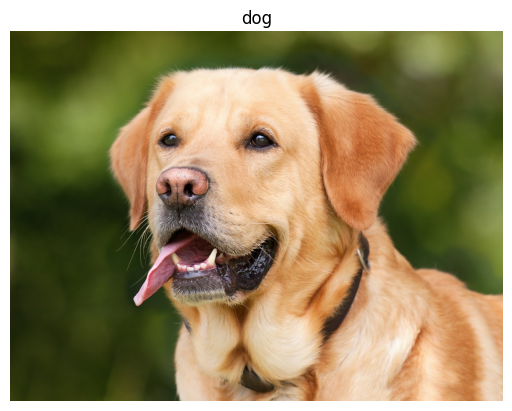

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

img_1 = '/content/drive/MyDrive/dataset/Minggu11/dataset/single_prediction/cat_or_dog_1.jpg'
img1 = cv.imread(img_1)
prediction = image_predict(img_1)
plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
plt.title(prediction)
plt.axis('off')
plt.show()

Kode ini memuat gambar dari path `img_1`, menggunakan OpenCV (`cv.imread`) untuk membaca gambar tersebut. Kemudian, gambar tersebut diprediksi menggunakan fungsi `image_predict`. Hasil prediksi (dalam hal ini "dog") ditampilkan sebagai judul pada gambar yang ditampilkan menggunakan `matplotlib`. Fungsi `cv.cvtColor` mengubah warna gambar dari format BGR (yang digunakan OpenCV) menjadi RGB untuk ditampilkan dengan benar di `matplotlib`.

Output yang dihasilkan adalah gambar yang menunjukkan "dog" sebagai prediksi berdasarkan gambar tersebut.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


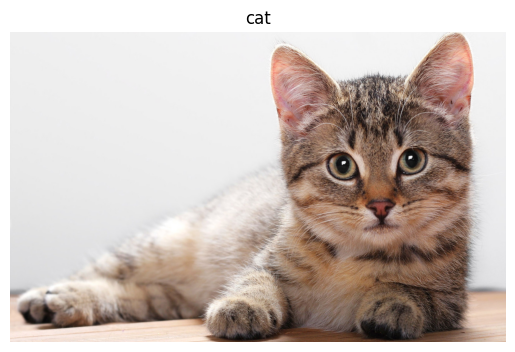

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

img_1 = '/content/drive/MyDrive/dataset/Minggu11/dataset/single_prediction/cat_or_dog_2.jpg'
img1 = cv.imread(img_1)
prediction = image_predict(img_1)
plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
plt.title(prediction)
plt.axis('off')
plt.show()

Kode ini mirip dengan kode sebelumnya, namun kali ini digunakan untuk memprediksi gambar lain (`cat_or_dog_2.jpg`). Gambar tersebut dibaca menggunakan OpenCV (`cv.imread`), kemudian diproses melalui fungsi `image_predict` untuk mendapatkan prediksi (dalam hal ini "cat"). Gambar ditampilkan menggunakan `matplotlib`, dengan prediksi ("cat") ditampilkan sebagai judul gambar.

Output yang dihasilkan adalah gambar yang menunjukkan "cat" sebagai prediksi berdasarkan gambar tersebut.

# Praktikum 2 Klasifikasi Multi-label dengan Data CIFAT

## Langkah 1 - Load Library

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Kode ini mengimpor pustaka yang diperlukan untuk membuat dan melatih model pembelajaran mendalam menggunakan TensorFlow dan Keras, serta untuk visualisasi menggunakan `matplotlib`.

## Langkah 2 - Unduh Dataset CIFAR

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

Kode ini memuat dataset CIFAR-10 yang terdiri dari gambar dan label pelatihan (`train_images`, `train_labels`) serta gambar dan label pengujian (`test_images`, `test_labels`). Kemudian, nilai piksel gambar dinormalisasi menjadi rentang antara 0 dan 1 dengan membagi nilai piksel dengan 255.

## Langkah 3 - Verifikasi Data

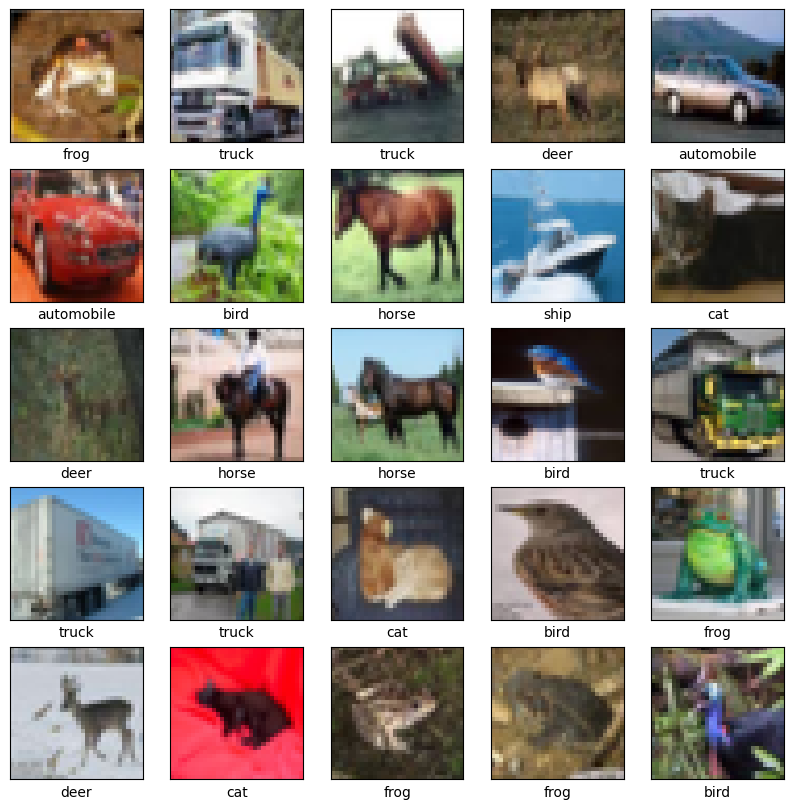

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Kode ini menampilkan 25 gambar pertama dari dataset CIFAR-10 dengan labelnya. Gambar ditampilkan dalam grid 5x5 tanpa sumbu dan grid. Label setiap gambar diambil dari `train_labels` dan dicocokkan dengan nama kelas di `class_names`.

## Langkah 4 - Buat Model CNN
### Langkah 4.1. - Buat Layer Konvolusi

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Kode ini membangun model CNN (Convolutional Neural Network) dengan tiga lapisan konvolusi (`Conv2D`) dan dua lapisan pooling maksimum (`MaxPooling2D`):

1. Lapisan pertama: `Conv2D` dengan 32 filter, kernel 3x3, fungsi aktivasi ReLU, dan input gambar berukuran 32x32 piksel dengan 3 saluran warna.
2. Lapisan pooling: `MaxPooling2D` dengan ukuran pool 2x2 untuk mengurangi dimensi gambar.
3. Lapisan kedua: `Conv2D` dengan 64 filter, kernel 3x3, dan fungsi aktivasi ReLU.
4. Lapisan pooling kedua: `MaxPooling2D` untuk mengurangi dimensi lagi.
5. Lapisan ketiga: `Conv2D` dengan 64 filter, kernel 3x3, dan fungsi aktivasi ReLU untuk mengekstrak fitur lebih lanjut.

### Langkah 4.2. - Cek Arsitektur Konvolusi

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

Model ini memiliki 56,320 parameter total. Terdapat 3 lapisan konvolusi (`Conv2D`) dan 2 lapisan pooling (`MaxPooling2D`). Setiap lapisan konvolusi mengekstrak fitur dari gambar, sedangkan lapisan pooling mengurangi dimensi gambar. Semua parameter model dapat dilatih.

### Langkah 4.3. - Tambahkan Layer Fully Connected

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Kode ini menambahkan lapisan-lapisan berikut ke model CNN:

1. **`Flatten()`**: Mengubah output 3D dari lapisan konvolusi menjadi 1D agar dapat diproses oleh lapisan dense.
2. **`Dense(64, activation='relu')`**: Lapisan fully connected dengan 64 neuron dan fungsi aktivasi ReLU.
3. **`Dense(10)`**: Lapisan output dengan 10 neuron (untuk 10 kelas di CIFAR-10) tanpa fungsi aktivasi, karena ini adalah masalah klasifikasi multi-kelas.

## Langkah 4.4. - Cek Arsitektur Model CNN

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Model ini memiliki total 122,570 parameter. Setelah menambahkan lapisan `Flatten` dan dua lapisan `Dense`, jumlah parameter bertambah menjadi 122,570 yang semuanya dapat dilatih. Lapisan terakhir memiliki 10 neuron untuk klasifikasi 10 kelas.

## Langkah 4.5. - Compile Model CNN

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Kode ini mengonfigurasi model untuk pelatihan dengan:

- **Optimizer**: Adam, yang efisien dalam mengoptimalkan model.
- **Loss function**: `SparseCategoricalCrossentropy` dengan `from_logits=True`, digunakan untuk klasifikasi multi-kelas dengan label integer (bukan one-hot encoding).
- **Metrics**: Akurasi untuk mengevaluasi kinerja model selama pelatihan.

## Langkah 5 - Fit Model

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3569 - loss: 1.7363 - val_accuracy: 0.5383 - val_loss: 1.2710
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5779 - loss: 1.1913 - val_accuracy: 0.6249 - val_loss: 1.0662
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6470 - loss: 0.9966 - val_accuracy: 0.6666 - val_loss: 0.9602
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6831 - loss: 0.8959 - val_accuracy: 0.6863 - val_loss: 0.9035
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7105 - loss: 0.8190 - val_accuracy: 0.6955 - val_loss: 0.8881
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7414 - loss: 0.7407 - val_accuracy: 0.6897 - val_loss: 0.8908
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7553 - loss: 0.7008 - val_accuracy: 0.7051 - val_loss: 0.8676
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7691 - loss: 0.6559 

Kode ini melatih model selama 10 epoch menggunakan data pelatihan dan memvalidasinya dengan data uji setelah setiap epoch.

## Langkah 6 - Evaluasi Model

313/313 - 1s - 2ms/step - accuracy: 0.7200 - loss: 0.8575


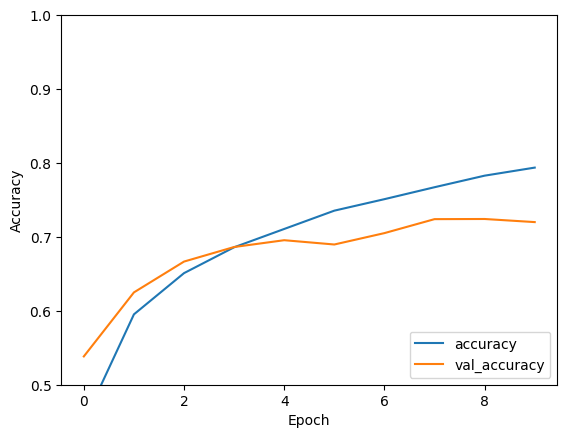

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

Kode ini menggambar grafik akurasi pelatihan dan validasi model selama pelatihan. Sumbu x adalah epoch (jumlah iterasi), dan sumbu y adalah akurasi. Setelah itu, kode mengevaluasi model menggunakan data uji dan menyimpan hasilnya dalam `test_loss` dan `test_acc`.

## Langkah 7 - Cetak Hasil Akurasi

In [ ]:
print(test_acc)

0.7200000286102295


Output `0.7200000286102295` menunjukkan akurasi model pada data uji sebesar sekitar 72%. Ini berarti model berhasil mengklasifikasikan data uji dengan tingkat akurasi 72%.

- Berapa akurasi yang Anda dapatkan?
- Jawab: Akurasi yang saya dapatkan sebesar 0.7200000286102295 atau dalam persentase sekitar 72.00%

# Tugas
- Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.



In [ ]:
# Langkah 1 - Import Library
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Langkah pertama ini mengimpor library TensorFlow untuk membangun model, Keras untuk lapisan dan dataset, serta Matplotlib untuk membuat grafik.

In [ ]:
# Langkah 2 - Unduh Dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

Pada langkah kedua, kode ini mengunduh dataset CIFAR-10, yang berisi gambar-gambar untuk pelatihan dan pengujian. Dataset ini dibagi menjadi data pelatihan dan data uji. Setelah itu, nilai piksel gambar dinormalisasi agar berada antara 0 dan 1, dengan membagi nilai piksel yang awalnya antara 0 hingga 255 dengan 255.

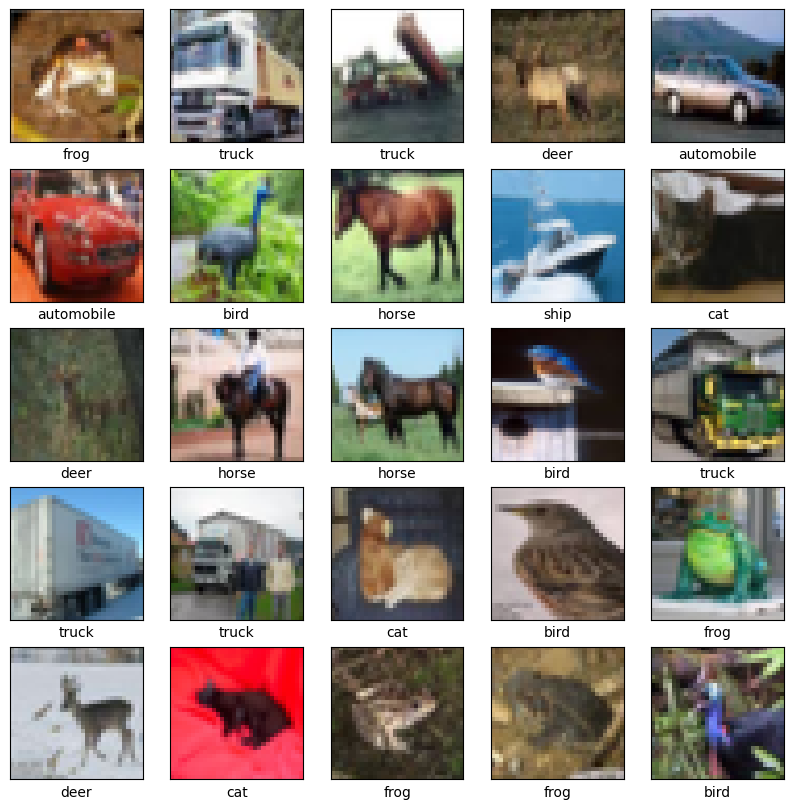

In [ ]:
# Langkah 3 - Verifikasi Data
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Pada langkah ketiga, kode ini menampilkan 25 gambar pertama dari dataset pelatihan beserta label kelasnya (misalnya pesawat, mobil, anjing, dll). Setiap gambar ditampilkan tanpa sumbu atau grid, dan label kelas ditambahkan di bawah gambar menggunakan nama yang sesuai dari daftar `class_names`.

In [ ]:
# Langkah 4 - Buat Model CNN
model = models.Sequential()

# Convolution Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3) , padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3) , padding='same'))
model.add(layers.BatchNormalization())
# Pooling Layer
model.add(layers.MaxPooling2D((2, 2)))
# Dropout Layer
model.add(layers.Dropout(0.25))

# Convolution Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3) , padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3) , padding='same'))
model.add(layers.BatchNormalization())
# Pooling Layer
model.add(layers.MaxPooling2D((2, 2)))
# Dropout Layer
model.add(layers.Dropout(0.25))

# Convolution Layer
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3) , padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3) , padding='same'))
model.add(layers.BatchNormalization())
# Pooling Layer
model.add(layers.MaxPooling2D((2, 2)))
# Dropout Layer
model.add(layers.Dropout(0.25))


model.add(layers.Flatten())
# Full Connected Layer
model.add(layers.Dense(128, activation='relu'))
# Dropout Layer
model.add(layers.Dropout(0.25))
# Output Layer
model.add(layers.Dense(10, activation='softmax'))

# Langkah 4.5 - Compile Model CNN
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Pada langkah keempat, kode ini membuat model CNN dengan beberapa lapisan konvolusi untuk mendeteksi fitur gambar, lapisan pooling untuk mengurangi ukuran gambar, dan lapisan dropout untuk mencegah overfitting. Setelah itu, data diratakan (flatten) dan diteruskan ke lapisan fully connected sebelum menghasilkan output dengan 10 kelas menggunakan softmax. Model kemudian di-*compile* dengan optimizer Adam dan fungsi kerugian SparseCategoricalCrossentropy.

In [ ]:
# Langkah 5 - Fit Model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.3623 - loss: 1.8151 - val_accuracy: 0.5703 - val_loss: 1.1999
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6004 - loss: 1.1261 - val_accuracy: 0.5703 - val_loss: 1.3275
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6803 - loss: 0.9205 - val_accuracy: 0.7222 - val_loss: 0.8109
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7230 - loss: 0.7985 - val_accuracy: 0.7521 - val_loss: 0.7299
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7498 - loss: 0.7212 - val_accuracy: 0.7744 - val_loss: 0.6702
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7763 - loss: 0.6565 - val_accuracy: 0.7591 - val_loss: 0.7023
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7977 - loss: 0.5952 - val_accuracy: 0.7683 - val_loss: 0.6921
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8065 - loss: 0.5621 - val_accur

Pada langkah kelima, model dilatih menggunakan data pelatihan selama 10 epoch. Setiap epoch menunjukkan akurasi dan kerugian pada data pelatihan (`accuracy`, `loss`) serta data validasi (`val_accuracy`, `val_loss`). Output yang ditampilkan menunjukkan progres pelatihan, dengan akurasi model meningkat dari sekitar 36% pada epoch pertama menjadi sekitar 83% pada epoch terakhir. Selain itu, akurasi validasi juga menunjukkan peningkatan yang signifikan. Peringatan yang muncul berkaitan dengan penggunaan `from_logits=True` saat fungsi aktivasi softmax digunakan, yang dapat diabaikan dalam konteks ini.

313/313 - 1s - 2ms/step - accuracy: 0.8183 - loss: 0.5400


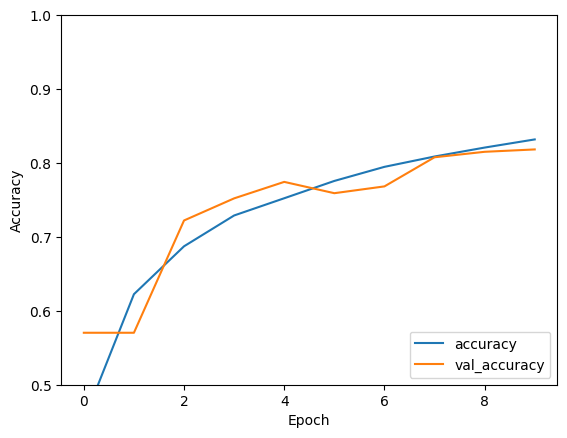

In [ ]:
# Langkah 6 - Evaluasi Model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

Pada langkah keenam, kode ini menggambar grafik yang menunjukkan perubahan akurasi model pada data pelatihan (`accuracy`) dan data validasi (`val_accuracy`) selama proses pelatihan. Setelah itu, model dievaluasi menggunakan data uji (`test_images` dan `test_labels`), dan hasilnya, yaitu `test_loss` (kerugian) dan `test_acc` (akurasi), dicetak untuk melihat kinerja model pada data yang belum pernah dilihat sebelumnya.

In [ ]:
# Langkah 7 - Cetak Hasil Akurasi
print(test_acc)

0.8165000081062317


Pada langkah ketujuh, kode ini mencetak akurasi model pada data uji, yang dalam hal ini adalah sekitar **81.65%**. Artinya, model berhasil mengklasifikasikan gambar dalam dataset uji dengan tingkat akurasi sebesar 81.65%.

- Buatlah model CNN untuk klasifikasi dataset MNIST.

In [ ]:
# Langkah 1 - Import Library
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Langkah pertama ini mengimpor library yang diperlukan untuk membangun dan melatih model. TensorFlow digunakan untuk pembuatan model, Keras menyediakan alat untuk lapisan dan dataset, sementara Matplotlib digunakan untuk membuat grafik.

In [ ]:
# Langkah 2 - Unduh Dataset MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

Pada langkah kedua, kode ini mengunduh dataset MNIST yang berisi gambar angka (0-9) untuk pelatihan dan pengujian. Dataset ini dibagi menjadi data pelatihan dan data uji. Nilai piksel gambar kemudian dinormalisasi agar berada antara 0 dan 1 dengan membagi nilai piksel yang semula antara 0-255 dengan 255.

In [ ]:
# Langkah 3 - Buat Model CNN untuk MNIST
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Pada langkah ketiga, kode ini membuat model CNN dengan tiga lapisan konvolusi untuk mendeteksi fitur gambar, diikuti dengan lapisan pooling untuk mengurangi dimensi. Hasilnya kemudian diratakan (flatten) dan diteruskan ke lapisan fully connected untuk klasifikasi, dengan output 10 kelas menggunakan softmax.

In [ ]:
# Langkah 4 - Compile Model CNN
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Pada langkah keempat, kode ini meng-*compile* model dengan menggunakan optimizer **Adam**, fungsi kerugian **sparse_categorical_crossentropy** untuk klasifikasi, dan metrik **accuracy** untuk mengevaluasi kinerja model.

In [ ]:
# Langkah 5 - Fit Model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8936 - loss: 0.3421 - val_accuracy: 0.9854 - val_loss: 0.0450
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9848 - loss: 0.0496 - val_accuracy: 0.9887 - val_loss: 0.0364
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9897 - loss: 0.0330 - val_accuracy: 0.9889 - val_loss: 0.0344
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9914 - loss: 0.0268 - val_accuracy: 0.9917 - val_loss: 0.0274
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9941 - loss: 0.0183 - val_accuracy: 0.9905 - val_loss: 0.0349
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9951 - loss: 0.0150 - val_accuracy: 0.9886 - val_loss: 0.0387
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9961 - loss: 0.0118 - val_accuracy: 0.9915 - val_loss: 0.0278
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9968 - loss: 0.0099 -

Pada langkah kelima, model dilatih selama 10 epoch menggunakan data pelatihan, dengan hasil yang menunjukkan peningkatan akurasi dari sekitar 89% pada epoch pertama menjadi sekitar 99.8% pada epoch terakhir. Akurasi pada data validasi juga tetap tinggi, berkisar antara 98% hingga 99.8%. Hal ini menunjukkan bahwa model berhasil belajar dengan baik dan mencapai kinerja yang sangat baik pada dataset MNIST.

313/313 - 0s - 1ms/step - accuracy: 0.9914 - loss: 0.0350


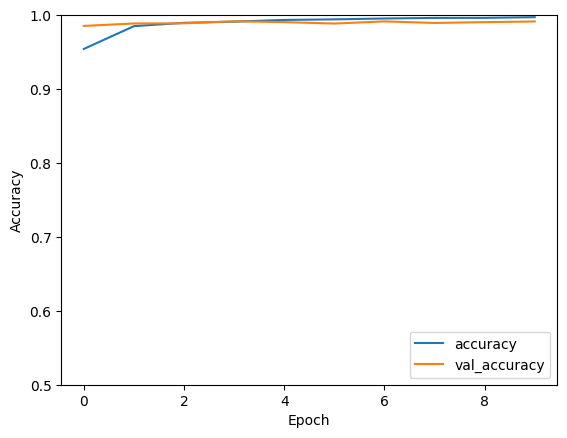

In [ ]:
# Langkah 6 - Evaluasi Model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

Pada langkah keenam, kode ini menggambar grafik yang menunjukkan perubahan akurasi model pada data pelatihan (`accuracy`) dan data validasi (`val_accuracy`) selama pelatihan. Setelah itu, model dievaluasi menggunakan data uji (`test_images` dan `test_labels`), dan hasilnya, yaitu **kerugian (loss)** dan **akurasi (accuracy)** pada data uji, dicetak untuk mengevaluasi kinerja model pada data yang belum pernah dilihat sebelumnya.

In [ ]:
# Langkah 7 - Cetak Hasil Akurasi
print(test_acc)

0.9914000034332275


Pada langkah ketujuh, kode ini mencetak akurasi model pada data uji, yang dalam hal ini adalah sekitar **99.14%**. Artinya, model berhasil mengklasifikasikan gambar dalam dataset uji dengan tingkat akurasi yang sangat tinggi.